#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 4
#### Topics:
- ANOVA


#### Due: 10/05/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

# Problem 1 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']`` 
plus a constant term. Remove all entries in which one or more of these predictors is missing. 
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.
 - In which method $R^2$ is smaller?
2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same pannel to convince yourself that both methods resulted in similar fitted responses. 
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$ and indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution. 

The largest difference is for the first predictor, which is the constant covariate. We can check that this result makes sense by fiting a new model without the constant covaraite and test whether the residuals in the smaller new model are not significantly different than those in the original model. 

You can use the code below to read and arrange the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

target = 'SalePrice' 
lo_predictors = ['const', 'SalePrice', 'LotArea',  'YearBuilt',
    'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
    'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
    '1stFlrSF', 'LotFrontage', 'ScreenPorch',
     'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1                  # add constant term
data = data.filter(lo_predictors).dropna() # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

In [3]:
data.isna().any()

const           False
SalePrice       False
LotArea         False
YearBuilt       False
GarageCars      False
YrSold          False
MoSold          False
Fireplaces      False
HalfBath        False
LowQualFinSF    False
TotalBsmtSF     False
1stFlrSF        False
LotFrontage     False
ScreenPorch     False
WoodDeckSF      False
OverallCond     False
BsmtUnfSF       False
dtype: bool

In [5]:
beta_hat = np.linalg.pinv(Z.T@Z) @X.T @ y
beta_hat

0    -3.039717e+06
1     2.978147e+00
2     6.168397e+02
3     2.125655e+04
4     8.849460e+02
5     9.837942e+02
6     1.676336e+04
7     2.791565e+04
8     6.896052e+01
9     4.389619e+01
10    4.127521e+01
11    7.334650e-01
12    2.266803e+01
13    3.083091e+01
14    7.715939e+03
15   -8.101915e+00
dtype: float64

In [103]:
U, S, V = np.linalg.svd(Z, full_matrices=False)
S[S/S[0] < 10**-6] = 0
y_bar = U.T @ y
b = np.divide(y_bar, S,out=np.zeros_like(y_bar),where=S!=0)
beta_hat_svd = V.T @ b
beta_hat_svd

array([-2.66231312e-01,  2.94015286e+00,  6.12373502e+02,  2.11977738e+04,
       -6.24392417e+02,  8.66645736e+02,  1.66472314e+04,  2.80301124e+04,
        6.80687160e+01,  4.40990441e+01,  4.14120543e+01,  6.73220554e+00,
        2.32736194e+01,  3.18006904e+01,  7.70838607e+03, -8.17708194e+00])

In [108]:
y_hat = X.values @ beta_hat
y_hat_svd = X.values @ beta_hat_svd
print(f"R2 of y_hat: {r2_score(y, y_hat)} R2 of y_hat_beta: {r2_score(y,y_hat_svd)}")

R2 of y_hat: 0.7452057267967913 R2 of y_hat_beta: 0.7445113674228728


In [122]:
df = pd.DataFrame({'y':y, 'y_hat':y_hat, 'y_hat_svd':y_hat_svd})

We see that that y_hat_beta using the svd is somewhat smaller, by a small margin.

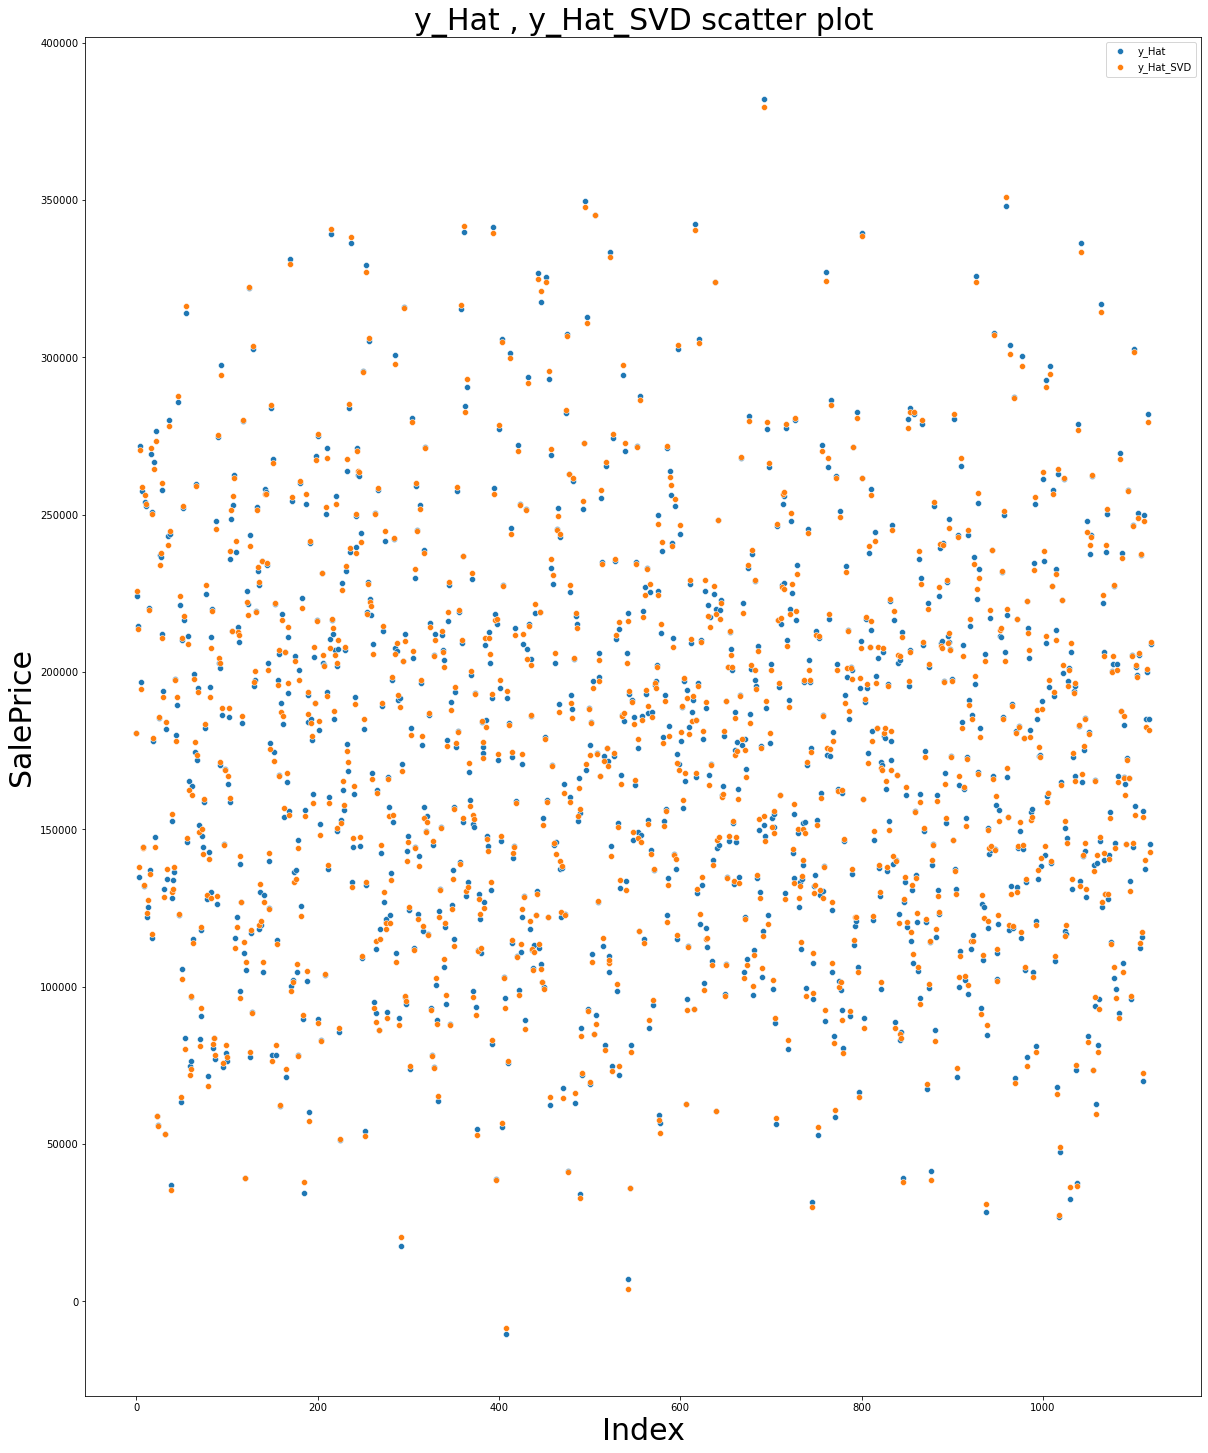

In [183]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [20,25]
sns.scatterplot(data=df, x=range(len(df)),y=y_hat)
sns.scatterplot(data=df, x=range(len(df)),y=y_hat_svd)
plt.xlabel('Index',size=30)
plt.ylabel("SalePrice",size=30)
plt.title("y_Hat , y_Hat_SVD scatter plot",size=30)
plt.legend(['y_Hat', 'y_Hat_SVD'])
plt.show()

<BarContainer object of 16 artists>

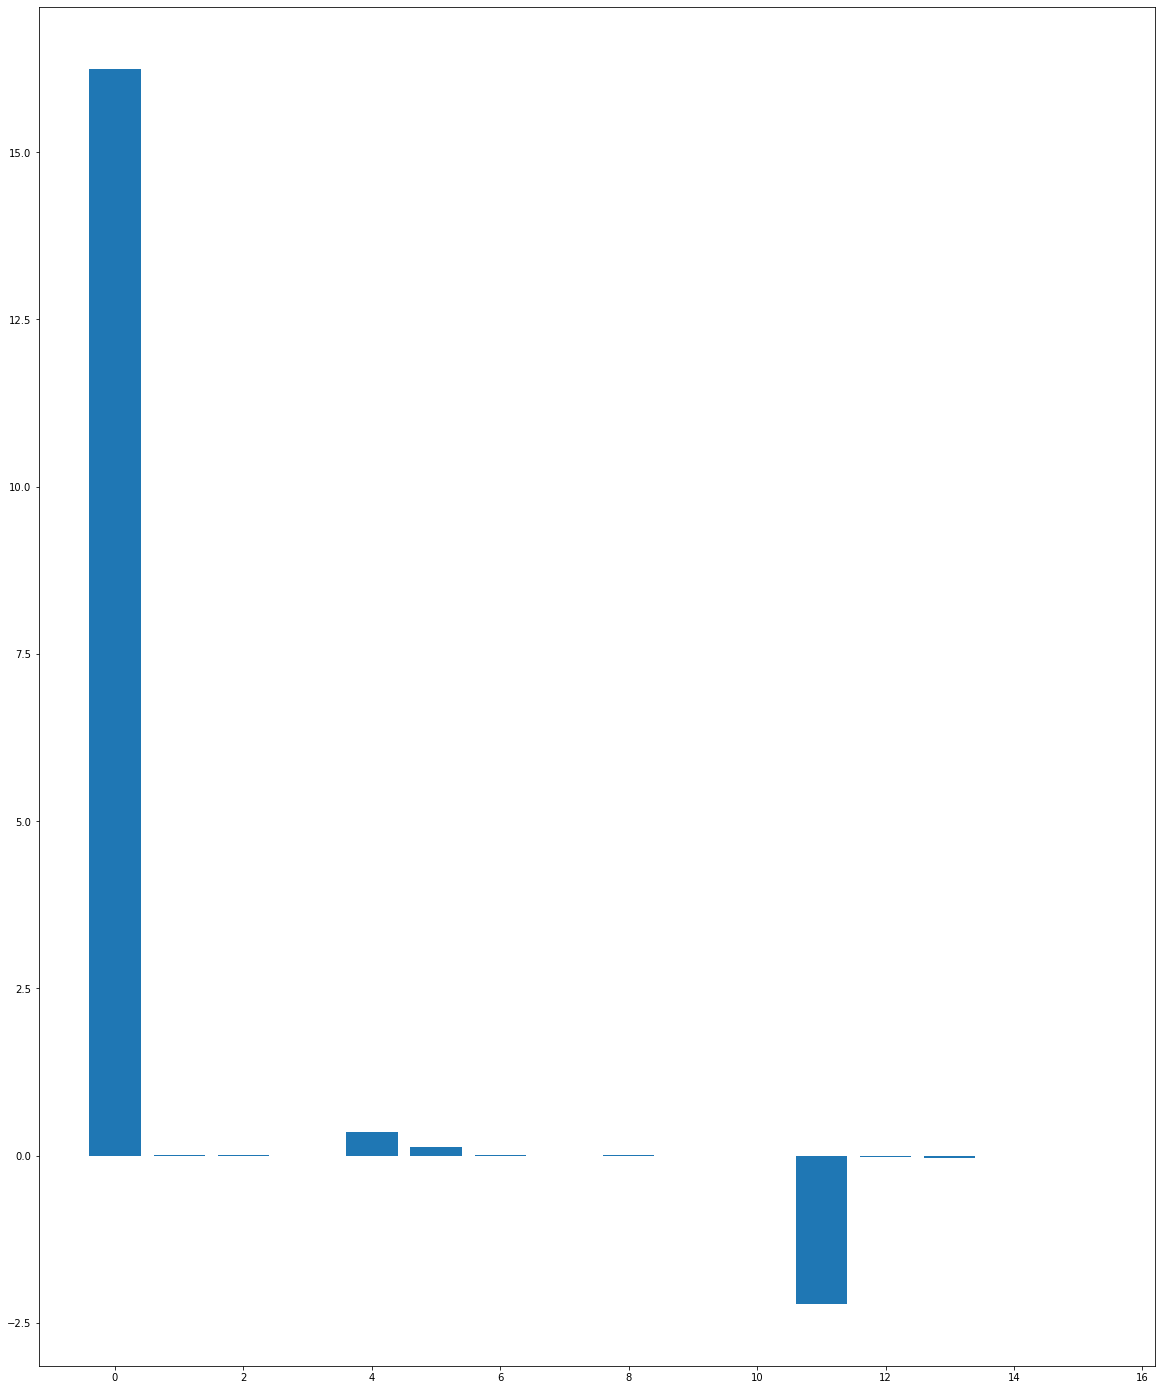

In [147]:
plt.bar(range(len(beta_hat)), np.log(abs(beta_hat / beta_hat_svd)))

It is clear there is a major difference in the first coffient used between the methods

## Problem 1 ($t$-test is a kind of ANOVA)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_j + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1. 
$$

1. Find the statistic $t$ for the two-sample $t$ test (using of the observable varaibles)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using of the observable varaibles)
3. Conclude that $t^2 = F$. 
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$ ? less? same? 


## Problem 3 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{equation}
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\label{eq:ANOVA} \tag{1}
\end{equation}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $\eqref{eq:ANOVA}$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

## Problem 4 (ANOVA and multiple testing in Practice)

Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winary (``winary``) on the quality (``points``) of wine of veriaty ``Cabernet Sauvignon``. 
1. Load dataset; keep only relevant records according to the fields ``country`` and ``veriaty``; remove winaries with 1 or less samples (because we cannot do ANOVA for those)
2. Plot the boxplot with ``winary`` as the x-axis and ``points`` as the y-axis.
3. Use ANOVA to figure out whether some winaries make better cabernets than others; print the ANOVA table and explain your conclusion
4. Find which winaries have cabernets ranked higher than others:
 - Run all paired t-tests; how many of the test's P-values fall below 0.05? is it more than what is expceted if all tests are null?
 - Use Bonferroni's method to decide which winaries ranked singnificantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

In [162]:
wine = pd.read_csv("winemag-data_first150k.csv")
wine = wine[(wine['country']=='Israel') & (wine['variety']=='Cabernet Sauvignon')]
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
81,81,Israel,"Dark red violet in color, this wine has aromas...",Reserve,91,25.0,Upper Galilee,NaN,NaN,Cabernet Sauvignon,Binyamina
355,355,Israel,Restrained aromas of black plum barely set the...,NaN,91,40.0,Golan Heights,NaN,NaN,Cabernet Sauvignon,Bazelet HaGolan
966,966,Israel,"This wine is dark red-violet color to the eye,...",Special Reserve,90,20.0,Galilee,NaN,NaN,Cabernet Sauvignon,Segal's
970,970,Israel,"Dark garnet in the glass, this wine has a nose...",Mt. Tabor,90,15.0,Galilee,NaN,NaN,Cabernet Sauvignon,Tabor
977,977,Israel,"Dark black cherry in color, this wine offers a...",NaN,90,55.0,Judean Hills,NaN,NaN,Cabernet Sauvignon,Yatir
...,...,...,...,...,...,...,...,...,...,...,...
137688,137688,Israel,"Medium-bodied and soundly structured, this off...",Kosher,84,16.0,Galilee,NaN,NaN,Cabernet Sauvignon,Recanati
137985,137985,Israel,"A well structured Cab with plenty of cassis, b...",Special Reserve Kosher,84,38.0,Galilee,NaN,NaN,Cabernet Sauvignon,Recanati
141354,141354,Israel,Recanati's most ambitious effort is also its b...,Special Reserve Kosher,89,35.0,Galilee,NaN,NaN,Cabernet Sauvignon,Recanati
150238,150238,Israel,This international-style Cabernet from Israel ...,NaN,88,14.0,Galilee,NaN,NaN,Cabernet Sauvignon,Gamla


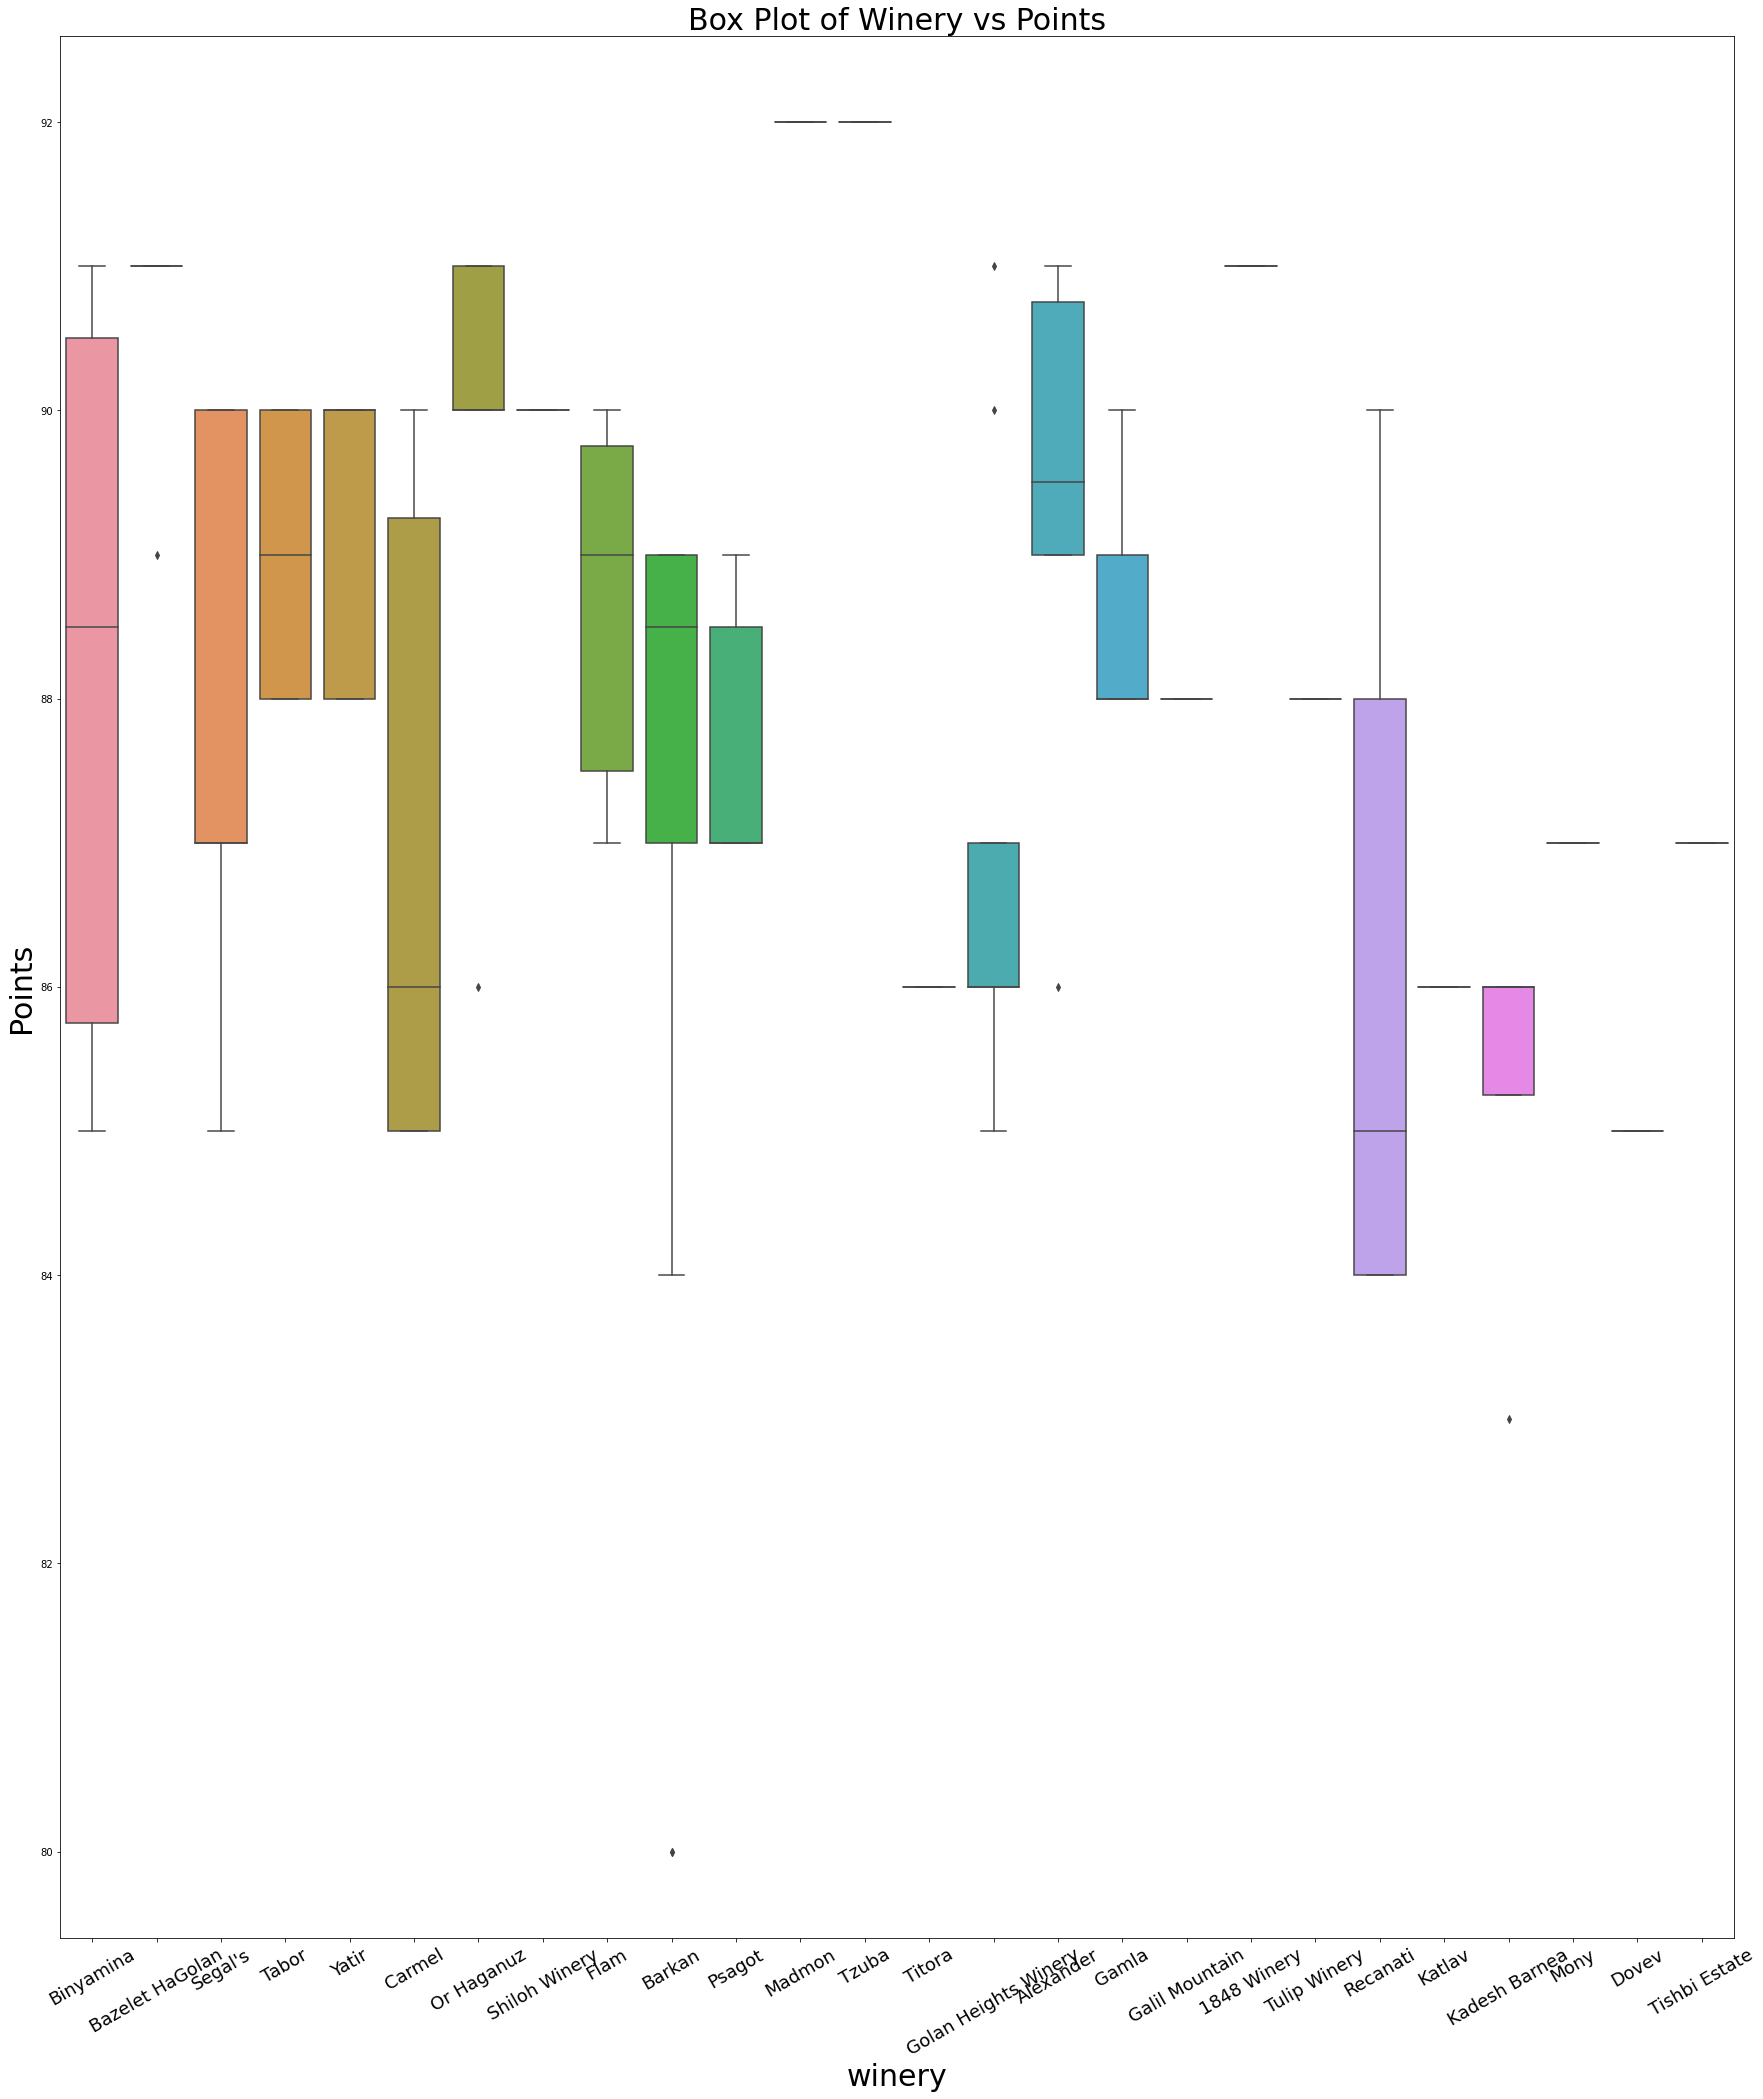

In [181]:
plt.rcParams["figure.figsize"] = [30,35]
sns.boxplot(data=wine,x='winery', y='points')
plt.xticks(rotation=30,size=18)
plt.xlabel("winery",size=30)
plt.ylabel("Points",size=30)
plt.title("Box Plot of Winery vs Points",size=30)
plt.show()